In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
weather = pd.read_csv('Weather Test Data.csv')

In [78]:
weather.drop(["Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"],axis=1)
weather.dropna()
weather

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,Row43633,Uluru,2.4,19.1,0.0,NaN,NaN,E,33.0,SE,...,17.0,59.0,24.0,1030.0,1026.2,NaN,NaN,8.0,18.8,No
42673,Row43634,Uluru,2.3,21.4,0.0,NaN,NaN,SE,22.0,SE,...,7.0,60.0,28.0,1026.9,1022.8,NaN,NaN,8.9,20.3,No
42674,Row43635,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,7.0,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No
42675,Row43636,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,17.0,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No


In [79]:
weather.dropna(subset=['RainToday'], inplace=True) #only rows which has null values should be dropped

In [80]:
for column in weather.columns:  #filling missing values with mean
    if weather[column].dtype == 'object':
        weather[column].fillna(weather[column].mode()[0], inplace=True)
    else:
        weather[column].fillna(weather[column].mean(), inplace=True)


In [81]:
label_encoder = LabelEncoder()   #converts string data to numerical datr
weather['RainToday'] = label_encoder.fit_transform(weather['RainToday'])

In [82]:
X = weather[['MinTemp', 'MaxTemp']]  
y = weather['RainToday']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = model.predict(X_test) #predicts the output based on the X_test data
y_pred_proba = model.predict_proba(X_test)[:, 1] #will return two columns one for no rain and one for rain

In [86]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [87]:
accuracy

0.7819329388560158

Text(50.722222222222214, 0.5, 'Actual')

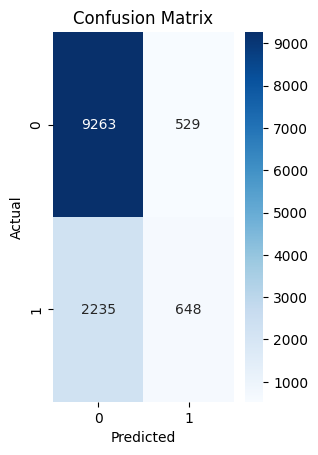

In [88]:
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')